# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [18]:
df=pd.read_csv('Customer_Behaviour.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### View the top 5 rows

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [21]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [22]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [23]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### View unique values in Gender

In [24]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [25]:
def convert(x):
    if x=='Male':
        return 0
    elif x=='Female':
        return 1

In [26]:
df['Gender']=df['Gender'].apply(convert)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


#### Drop user ID column

In [27]:
new_df=df.drop(columns='User ID')
new_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

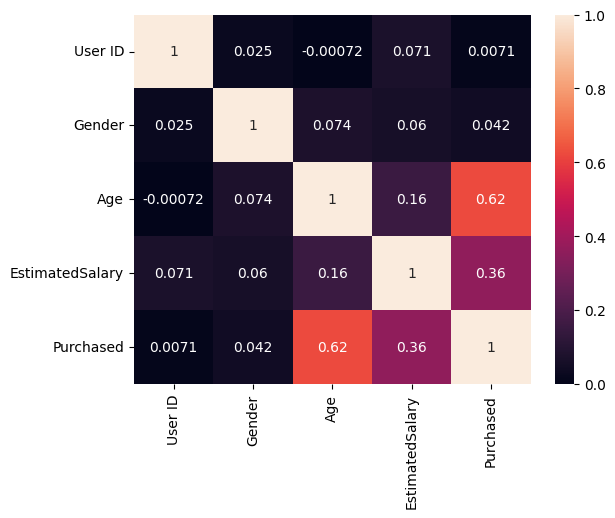

In [28]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [29]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### Plot a countplot of gender with respect to purchased

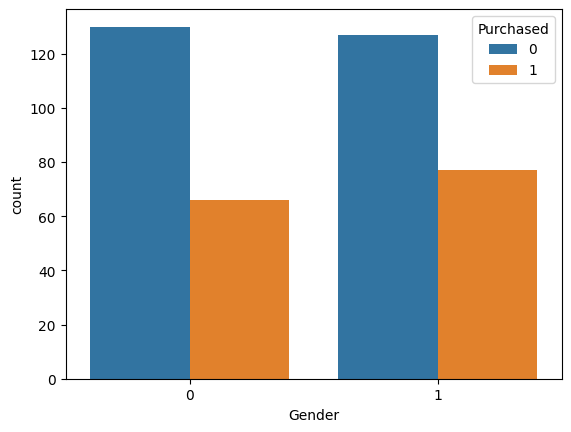

In [30]:
sns.countplot(data=df,x='Gender',hue='Purchased')
plt.show()

### Plot a displot of Age

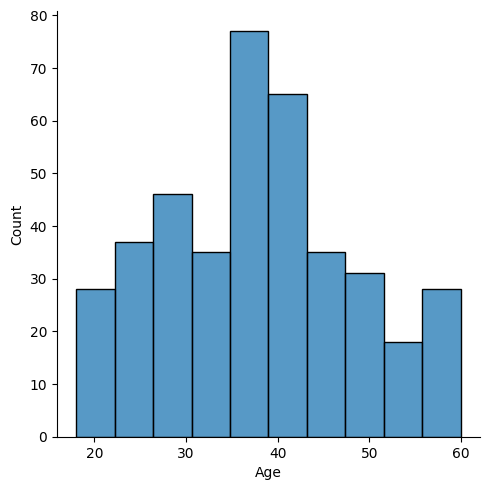

In [31]:
sns.displot(df['Age'])
plt.show()

### Plot pairplot of the dataset

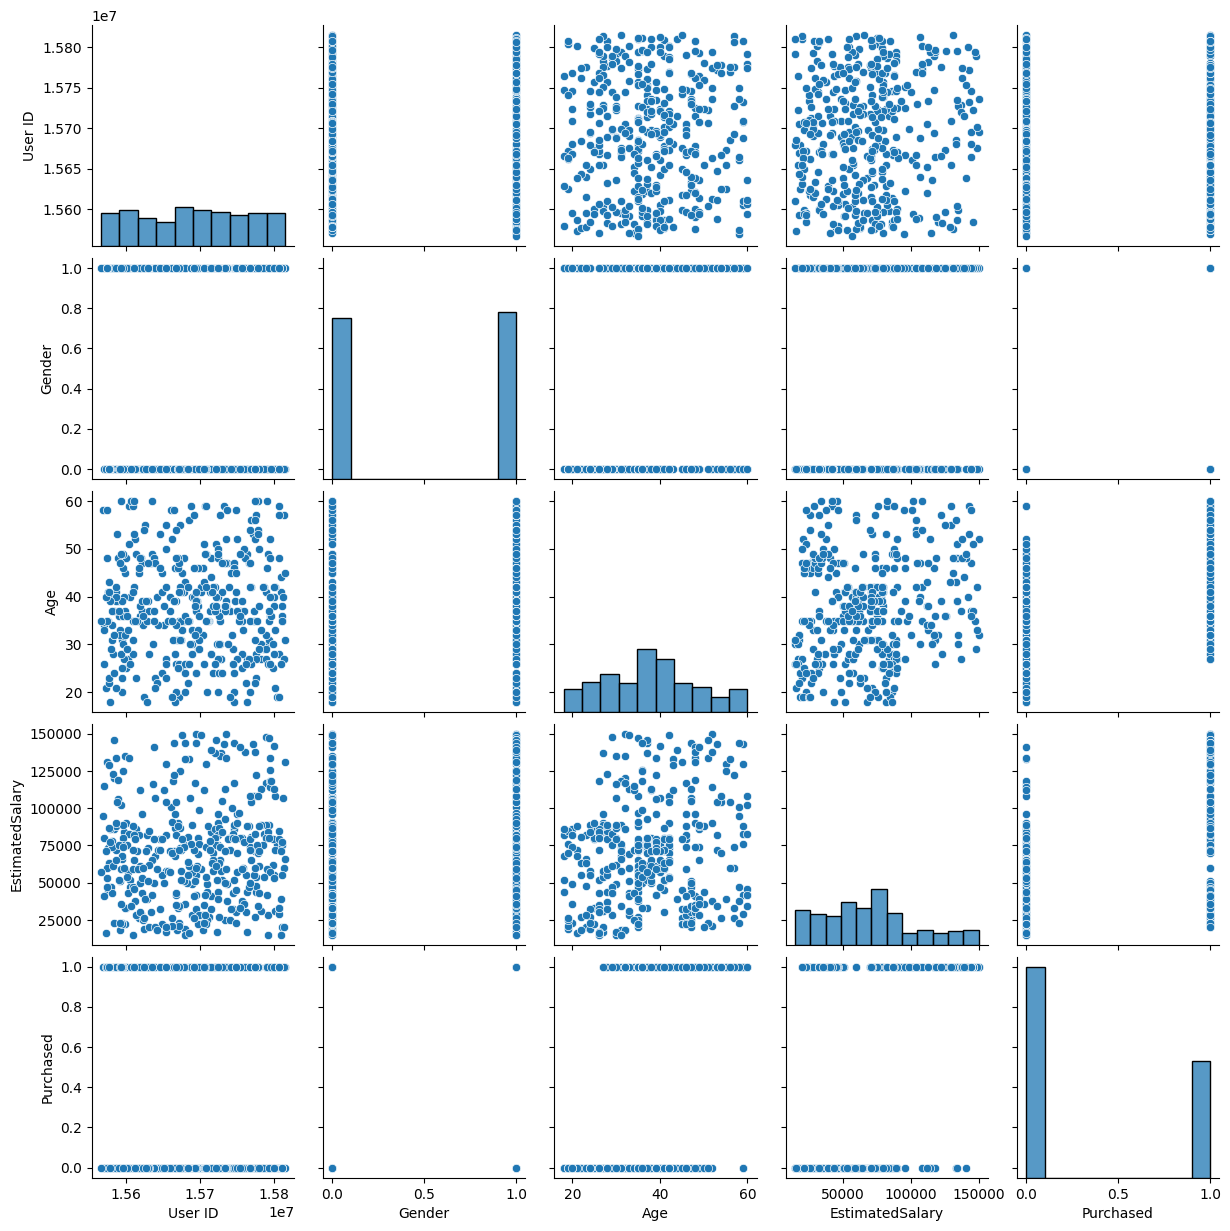

In [32]:
sns.pairplot(df)
plt.show()

## Data Preprocessing

In [33]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### Split the dataset into input and target variables

In [34]:
X=new_df.drop(columns=['Purchased'])
y=new_df['Purchased']

### Scale the data using StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
xcolumns=X.columns

In [38]:
X=scaler.fit_transform(X)

In [39]:
X=pd.DataFrame(X,columns=xcolumns)

In [40]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### Check shape of X_train and X_test

In [43]:
X_train.shape

(320, 3)

In [44]:
X_test.shape

(80, 3)

## ML Models

### Logistic Regression Classifier

In [45]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [46]:
model_lg=LogisticRegression()

In [47]:
model_lg.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [48]:
model_lg.score(X_train, y_train)

0.85625

In [49]:
y_pred_lg=model_lg.predict(X_test)

In [50]:
metrics.accuracy_score(y_test,y_pred_lg)

0.8375

In [51]:
metrics.confusion_matrix(y_test,y_pred_lg)

array([[45,  4],
       [ 9, 22]])

In [52]:
print(metrics.classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        49
           1       0.85      0.71      0.77        31

    accuracy                           0.84        80
   macro avg       0.84      0.81      0.82        80
weighted avg       0.84      0.84      0.83        80



In [53]:
#Mean of cross validation score

scores_lg=cross_val_score(model_lg,X,y,cv=10)

In [54]:
print('Mean of cross validation score:',scores_lg.mean())

Mean of cross validation score: 0.8225


### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model_rf = RandomForestClassifier(n_estimators=20)

In [57]:
model_rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",20
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [58]:
model_rf.score(X_train, y_train)

0.990625

In [59]:
y_pred_rf=model_rf.predict(X_test)

In [60]:
metrics.accuracy_score(y_test,y_pred_rf)

0.8875

In [61]:
metrics.confusion_matrix(y_test,y_pred_rf)

array([[46,  3],
       [ 6, 25]])

In [62]:
print(metrics.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.89      0.81      0.85        31

    accuracy                           0.89        80
   macro avg       0.89      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



In [63]:
# Mean of cross validation score
scores_rf=cross_val_score(model_rf,X,y,cv=10)

In [64]:
print('Mean of cross validation score:',scores_rf.mean())

Mean of cross validation score: 0.8724999999999999


### Support Vector Machine

In [65]:
from sklearn.svm import SVC

In [66]:
model_sv=SVC(probability=True)

In [67]:
model_sv.fit(X_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [68]:
import pickle

with open('svm.pkl','wb') as f:
    pickle.dump(model_sv,f)

In [69]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [70]:
model_sv.score(X_train,y_train)

0.9125

In [71]:
y_pred_sv=model_sv.predict(X_test)

In [72]:
metrics.accuracy_score(y_test,y_pred_sv)

0.9

In [73]:
metrics.confusion_matrix(y_test,y_pred_sv)

array([[46,  3],
       [ 5, 26]])

In [74]:
print(metrics.classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        49
           1       0.90      0.84      0.87        31

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [75]:
# Mean of cross validation score
scores_sv=cross_val_score(model_sv,X,y,cv=10)

In [76]:
print('Mean of cross validation score:',scores_sv.mean())

Mean of cross validation score: 0.905


In [77]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### Assign cross val scores of all models into a dataframe

In [78]:
new=pd.DataFrame({'Models':['model_lg','model_rf','model_sv'],'Mean of cross validation score': [0.8225,0.875,0.905]})
new.sort_values(by='Mean of cross validation score',ascending=False)

,Models,Mean of cross validation score
2,model_sv,0.9050
1,model_rf,0.8750
0,model_lg,0.8225


In [79]:
# or

models={'SVM':scores_sv.mean(),'RF':scores_rf.mean(),'LG':scores_lg.mean()}
result=pd.DataFrame(models.items(),columns=['Model','Score'])
result

,Model,Score
0,SVM,0.9050
1,RF,0.8725
2,LG,0.8225


***

## Deploy the model with highest score using Streamlit

In [82]:
%%writefile app.py

import numpy as np
import streamlit as st
import pickle

#load model

def load_model():
    try:
        with open('svm.pkl','rb') as file:
            model=pickle.load(file)

        scaler=None
        try:
            with open('scaler.pkl','rb') as file:
                scaler=pickle.load(file)
        except:
            st.warning('Scaler not found')

        return model,scaler
    except FileNotFoundError as e:
        return f'Model file is not found: {e}'

model,scaler=load_model()

#convert gender to numerical

def genderinput(gender_input):
    if gender_input=='Male':
        return 0
    else:
        return 1


#convert predictions to text

def resultout(result):
    if result==1:
        return 'Yes'
    else:
        return 'No'


#function for prediction

def customer_predict(gender_input,age_input,salary_input):
    try:
        gender_value=genderinput(gender_input)
        age_value=float(age_input)
        salary_value=float(salary_input)

        input_data=np.array([[gender_value,age_value,salary_value]])

        if scaler is None or not hasattr(scaler,'transform'):
            return 'Error scaler not available or invalid'

        scaled_data=scaler.transform(input_data)

        prediction=model.predict(scaled_data)
        probabilities=model.predict_proba(scaled_data)
        predicted_purchase=int(prediction[0])

        confidence=probabilities[0][predicted_purchase]

        return predicted_purchase, confidence
    except Exception as e:
        return f"Prediction Error: {e}", None


#main

st.title('Customer Behaviour Predction App')
gender_input=st.selectbox('Select Gender',['Male','Female'])
age_input=st.number_input('Enter Age',min_value=18,max_value=100,value=30) 
salary_input=st.number_input('Enter Estimated Salary',min_value=0,max_value=5000,step=500) 

if st.button('Predict Customer Purchase'):
    if model is None:
        st.error('Model not loaded properly. Please check the file')

    result, confidence=customer_predict(gender_input,age_input,salary_input)
    
    if isinstance(result,str) and (result.startswith('Error') or result.startswith('Prediction Error')):
        st.error(result)
    else:
        result_output=resultout(result)
        if result_output=='Yes':
            st.success(f'Will Customer Purchase ? : {result_output}')
        else:
            st.error(f'Will Customer Purchase ? : {result_output}') 

        if confidence is not None:
            st.info(f'Confidence : {confidence:.2%}')

Overwriting app.py


***

# <span style = "color:green;font-size:40px"> Great Job! </span>